# Classify different data sets

### Basic includes

In [1]:
# Using pandas to load the csv file
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from keras import models 
from keras import layers 
from keras import callbacks
from keras.utils import to_categorical
from keras import optimizers
from keras import regularizers

# reuters and fashin mnist data set from keras
from keras.datasets import reuters
from keras.datasets import fashion_mnist

# needed to preprocess text
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


### Classify the Fashion Mnist

---

(60000, 28, 28)


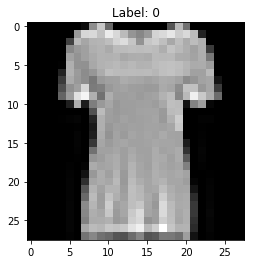

In [2]:
(fashion_train_data, fashion_train_labels), (fashion_test_data, fashion_test_labels) = fashion_mnist.load_data()

print(fashion_train_data.shape)

test_index = 10

plt.title("Label: " + str(fashion_train_labels[test_index]))
plt.imshow(fashion_train_data[test_index], cmap="gray")

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [3]:

# flatten arrays
fashion_train_data = fashion_train_data.reshape((60000, 28 * 28))
fashion_train_data = fashion_train_data.astype('float32') / 255 

print(fashion_train_data.shape)

# same starndadization for the test images
fashion_test_data = fashion_test_data.reshape((10000, 28 * 28)) 
fashion_test_data = fashion_test_data.astype('float32') / 255

# one hot encoding
fashion_train_labels = to_categorical(fashion_train_labels) 
fashion_test_labels = to_categorical(fashion_test_labels)

print(fashion_train_labels.shape)

#validation set
validation_data = fashion_train_data[:5000] #toma los primeros 5000 para validation
validation_labels = fashion_train_labels[:5000]

#toma a partir del 5000 para los training
x_data = fashion_train_data[5000:]
y_data = fashion_train_labels[5000:]

print(x_data.shape)

(60000, 784)
(60000, 10)
(55000, 784)


#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [4]:
network = models.Sequential()

network.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,))) #se puede cambiar la función de activación
#network.add(layers.Dropout(0.1))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dropout(0.2))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

early_stop = callbacks.EarlyStopping(monitor="val_loss", patience = 5)
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = network.fit(x_data, y_data, batch_size =256, epochs = 50,validation_data = (validation_data, validation_labels),callbacks=[early_stop], verbose=2,shuffle=True)

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
 - 3s - loss: 0.6583 - acc: 0.7717 - val_loss: 0.4213 - val_acc: 0.8506
Epoch 2/50
 - 2s - loss: 0.4315 - acc: 0.8468 - val_loss: 0.3643 - val_acc: 0.8712
Epoch 3/50
 - 2s - loss: 0.3819 - acc: 0.8633 - val_loss: 0.3424 - val_acc: 0.8750
Epoch 4/50
 - 2s - loss: 0.3527 - acc: 0.8722 - val_loss: 0.3338 - val_acc: 0.8766
Epoch 5/50
 - 2s - loss: 0.3321 - acc: 0.8787 - val_loss: 0.3222 - val_acc: 0.8868
Epoch 6/50
 - 1s - loss: 0.3132 - acc: 0.8857 - val_loss: 0.3148 - val_acc: 0.8862
Epoch 7/50
 - 1s - loss: 0.3039 - acc: 0.8879 - val_loss: 0.3010 - val_acc: 0.8892
Epoch 8/50
 - 1s - loss: 0.2869 - acc: 0.8938 - val_loss: 0.3002 - val_acc: 0.8942
Epoch 9/50
 - 1s - loss: 0.2798 - acc: 0.8965 - val_loss: 0.3053 - val_acc: 0.8874
Epoch 10/50
 - 1s - loss: 0.2678 - acc: 0.9024 - val_loss: 0.3013 - val_acc: 0.8862
Epoch 11/50
 - 1s - loss: 0.2616 - acc: 0.9023 - val_loss: 0.2918 - val_acc: 0.8928
Epoch 12/50
 - 1s - loss: 0.2504 - a

#### Evaluate the model, and plot the validation and accuracy


In [6]:
#evaluate the test data
results = network.evaluate(fashion_test_data, fashion_test_labels)
print(results)

10000/10000 [==============================] - 0s 25us/step
[0.3230239651799202, 0.8942]


In [7]:
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

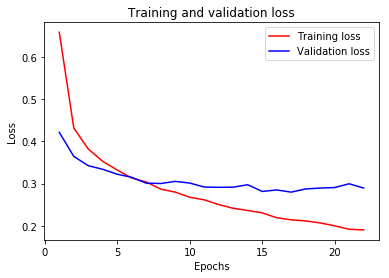

In [8]:
# Plot of the validation and training loss

plt.plot(epochs, loss, 'r', label='Training loss')#red line
plt.plot(epochs, val_loss, 'b', label='Validation loss')#blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

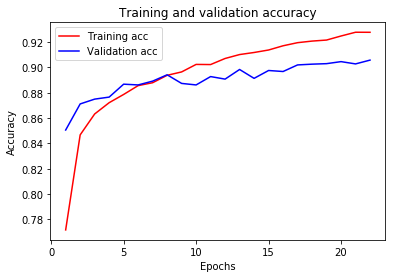

In [9]:
# Plot of the validation and train accuracy

plt.clf()   # clear figure

plt.plot(epochs, acc, 'r', label='Training acc')#red line
plt.plot(epochs, val_acc, 'b', label='Validation acc')#blue line
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Followed model
For this network, I tried first to do as much overfitting as possible to later add a dropout so that it could improve the predictions it has.

## Classifying newswires

---

Build a network to classify Reuters newswires into 46 different mutually-exclusive topics.

### Load and review the data

In [10]:
(reuters_train_data, reuters_train_labels),(reuters_test_data, reuters_test_labels) = reuters.load_data()

print(reuters_train_data.shape)
print(reuters_train_labels.shape)
print(reuters_train_data[0])
print(reuters_train_labels[0])

print(set(reuters_train_labels))

(8982,)
(8982,)
[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}


Load the word index to decode the train data.

In [11]:
word_index = reuters.get_word_index()

reverse_index = dict([(value+3, key) for (key, value) in word_index.items()])

reverse_index[0] = "<PAD>"
reverse_index[1] = "<START>"
reverse_index[2] = "<UNKNOWN>"  # unknown
reverse_index[3] = "<UNUSED>"

decoded_review = ' '.join([reverse_index.get(i,'?') for i in reuters_train_data[0]])

print(decoded_review)

<START> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [12]:
tokenizer = Tokenizer(8982)
reuters_train_data_token = tokenizer.sequences_to_matrix(reuters_train_data, mode = "binary")
reuters_test_data_token = tokenizer.sequences_to_matrix(reuters_test_data, mode = "binary")

print(reuters_train_data_token.shape)

#one hot encoding
one_hot_train_labels = to_categorical(reuters_train_labels)
one_hot_test_labels = to_categorical(reuters_test_labels)

print(one_hot_train_labels.shape)

#validation set
validation_data = reuters_train_data_token[:1790] #toma los primeros 5000 para validation
validation_labels = one_hot_train_labels[:1790]

#toma a partir del 5000 para los training
x_data = reuters_train_data_token[1790:]
y_data = one_hot_train_labels[1790:]

print(x_data.shape)

(8982, 8982)
(8982, 46)
(7192, 8982)


#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [13]:
network = models.Sequential()

network.add(layers.Dense(8, activation='relu', input_dim = 8982)) #se puede cambiar la función de activación
network.add(layers.Dropout(0.3))
#network.add(layers.Dense(20, activation='relu'))
#network.add(layers.Dropout(0.4))
#network.add(layers.Dense(512, activation='relu'))
#network.add(layers.Dropout(0.7))
#,kernel_regularizer=regularizers.l2(0.001)
network.add(layers.Dense(46, activation="softmax"))


network.summary()

early_stop = callbacks.EarlyStopping(monitor="val_loss", patience = 3)
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 71864     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 46)                414       
Total params: 72,278
Trainable params: 72,278
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = network.fit(x_data, y_data, batch_size =32, epochs = 1000,validation_split=0.2,callbacks=[early_stop], verbose=2,shuffle=True)

Train on 5753 samples, validate on 1439 samples
Epoch 1/1000
 - 1s - loss: 2.7846 - acc: 0.4419 - val_loss: 1.8839 - val_acc: 0.5678
Epoch 2/1000
 - 0s - loss: 1.8471 - acc: 0.5583 - val_loss: 1.5775 - val_acc: 0.6477
Epoch 3/1000
 - 0s - loss: 1.6308 - acc: 0.5860 - val_loss: 1.4362 - val_acc: 0.6769
Epoch 4/1000
 - 0s - loss: 1.4360 - acc: 0.6263 - val_loss: 1.3478 - val_acc: 0.6963
Epoch 5/1000
 - 0s - loss: 1.3293 - acc: 0.6384 - val_loss: 1.2844 - val_acc: 0.7109
Epoch 6/1000
 - 0s - loss: 1.2652 - acc: 0.6529 - val_loss: 1.2435 - val_acc: 0.7234
Epoch 7/1000
 - 0s - loss: 1.1901 - acc: 0.6732 - val_loss: 1.2035 - val_acc: 0.7338
Epoch 8/1000
 - 0s - loss: 1.1324 - acc: 0.6802 - val_loss: 1.1766 - val_acc: 0.7394
Epoch 9/1000
 - 0s - loss: 1.0707 - acc: 0.7003 - val_loss: 1.1639 - val_acc: 0.7366
Epoch 10/1000
 - 0s - loss: 1.0558 - acc: 0.6981 - val_loss: 1.1441 - val_acc: 0.7408
Epoch 11/1000
 - 1s - loss: 1.0021 - acc: 0.7082 - val_loss: 1.1375 - val_acc: 0.7464
Epoch 12/1000
 

#### Evaluate the model, and plot the validation and accuracy

In [15]:
#evaluate the test data
results = network.evaluate(reuters_test_data_token, one_hot_test_labels)
print(results)

2246/2246 [==============================] - 0s 52us/step
[1.1770589682849941, 0.7355298308103295]


In [16]:
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

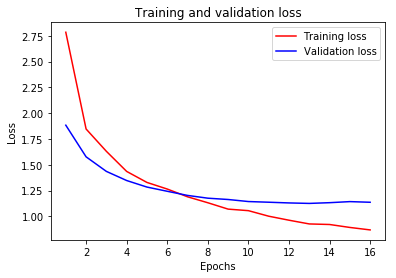

In [17]:
# Plot of the validation and training loss

plt.plot(epochs, loss, 'r', label='Training loss')#red line
plt.plot(epochs, val_loss, 'b', label='Validation loss')#blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

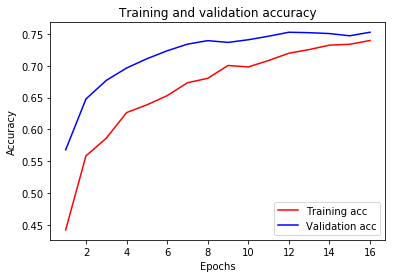

In [18]:
# Plot of the validation and train accuracy

plt.clf()   # clear figure

plt.plot(epochs, acc, 'r', label='Training acc')#red line
plt.plot(epochs, val_acc, 'b', label='Validation acc')#blue line
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Followed model

For this network, I tried first to do as much overfitting as possible, subsequently reduce the number of features that the network could learn, to do this the number of neurons was reduced to the minimum point in which it continued to generate overfitting, this was until It got to 8 neurons, also a dropout of 0.3 was added to 
to reduce as much as possible the overfitting.

## Predicting Student Admissions

---

Predict student admissions based on three pieces of data:

- GRE Scores
- GPA Scores
- Class rank

### Load and visualize the data

In [19]:
student_data = pd.read_csv("student_data.csv")
print(student_data)

     admit  gre   gpa  rank
0        0  380  3.61     3
1        1  660  3.67     3
2        1  800  4.00     1
3        1  640  3.19     4
4        0  520  2.93     4
5        1  760  3.00     2
6        1  560  2.98     1
7        0  400  3.08     2
8        1  540  3.39     3
9        0  700  3.92     2
10       0  800  4.00     4
11       0  440  3.22     1
12       1  760  4.00     1
13       0  700  3.08     2
14       1  700  4.00     1
15       0  480  3.44     3
16       0  780  3.87     4
17       0  360  2.56     3
18       0  800  3.75     2
19       1  540  3.81     1
20       0  500  3.17     3
21       1  660  3.63     2
22       0  600  2.82     4
23       0  680  3.19     4
24       1  760  3.35     2
25       1  800  3.66     1
26       1  620  3.61     1
27       1  520  3.74     4
28       1  780  3.22     2
29       0  520  3.29     1
..     ...  ...   ...   ...
367      1  540  3.77     2
368      1  680  3.76     3
369      1  680  2.42     1
370      1  620  3.3

Plot of the GRE and the GPA from the data.

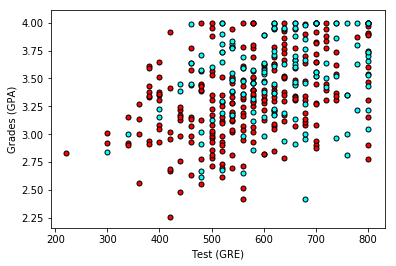

In [20]:
X = np.array(student_data[["gre","gpa"]])
y = np.array(student_data["admit"])
admitted = X[np.argwhere(y==1)]
rejected = X[np.argwhere(y==0)]
plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
plt.xlabel('Test (GRE)')
plt.ylabel('Grades (GPA)')

plt.show()

Plot of the data by class rank.

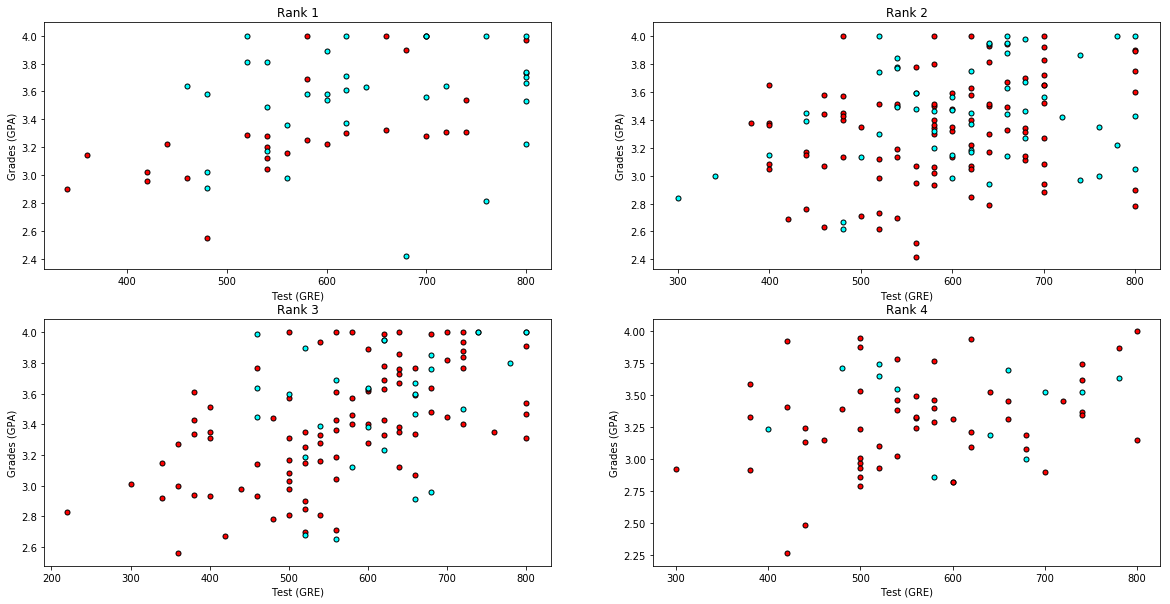

In [21]:
f, plots = plt.subplots(2, 2, figsize=(20,10))
plots = [plot for sublist in plots for plot in sublist]

for idx, plot in enumerate(plots):
    data_rank = student_data[student_data["rank"]==idx+1]
    plot.set_title("Rank " + str(idx+1))
    X = np.array(data_rank[["gre","gpa"]])
    y = np.array(data_rank["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plot.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plot.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plot.set_xlabel('Test (GRE)')
    plot.set_ylabel('Grades (GPA)')
    

#### TO DO: Preprocess the data

1. Normalize the input data set
2. Perform one hot encoding
3. Create a train, test, and validation set

In [29]:
#problema con alumnos que no tienen gre o gpa 
#Normalizando la información
#Información continua
#-media/devstand
#datos continuos
#para predecir debo restarle 1

data = np.array(student_data, dtype = np.float32)
np.random.shuffle(data)

media_gre = np.average(data[:,1])
std_gre = np.std(data[:,1])

media_gpa = np.average(data[:,2])
std_gpa = np.std(data[:,2])

norm_gre = (data[:,1]-media_gre)/std_gre
norm_gpa = (data[:,2]-media_gpa)/std_gpa
dat = to_categorical(data[:,3]-1) 



inputs = np.zeros((len(data),6))
inputs[:,0] = norm_gre
inputs[:,1] = norm_gpa
inputs[:,2:6] = dat
print(inputs)

train_data = inputs[130:]
train_labels = to_categorical(data[130:,0])

test_data = inputs[80:130]
test_labels = to_categorical(data[80:130,0])

validation_data = inputs[:80]
validation_labels = to_categorical(data[:80,0])

[[-0.58715755 -1.74398506  0.          1.          0.          0.        ]
 [-0.93326229 -1.90199232  0.          1.          0.          0.        ]
 [ 1.1433661   0.28377607  0.          0.          1.          0.        ]
 ...
 [ 0.27810425 -0.45359156  0.          1.          0.          0.        ]
 [ 0.97031373  1.38982785  0.          1.          0.          0.        ]
 [ 1.83557558  1.60050416  1.          0.          0.          0.        ]]


#### TO DO: Define and train a network, then plot the accuracy of the training, validation, and testing

1. Use a validation set
2. Propose and train a network
3. Print the history of the training
4. Evaluate with a test set

In [30]:
import random
network = models.Sequential()

network.add(layers.Dense(128, activation='relu', input_dim = 6))
network.add(layers.Dropout(0.4))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dropout(0.3))
network.add(layers.Dense(2, activation="softmax"))

#,kernel_regularizer=regularizers.l2(0.01)
network.summary()

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
early_stop = callbacks.EarlyStopping(monitor="val_loss", patience = 25)
network.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 5,090
Trainable params: 5,090
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = network.fit(train_data, train_labels, batch_size =64, epochs = 1000,validation_data = (validation_data, validation_labels),callbacks=[early_stop], verbose=2,shuffle=True)
#,callbacks=[early_stop]

Train on 267 samples, validate on 80 samples
Epoch 1/1000
 - 0s - loss: 0.6921 - acc: 0.5094 - val_loss: 0.6692 - val_acc: 0.6375
Epoch 2/1000
 - 0s - loss: 0.6733 - acc: 0.6142 - val_loss: 0.6441 - val_acc: 0.6875
Epoch 3/1000
 - 0s - loss: 0.6419 - acc: 0.6330 - val_loss: 0.6264 - val_acc: 0.6875
Epoch 4/1000
 - 0s - loss: 0.6365 - acc: 0.6330 - val_loss: 0.6129 - val_acc: 0.6875
Epoch 5/1000
 - 0s - loss: 0.6195 - acc: 0.6592 - val_loss: 0.6039 - val_acc: 0.6875
Epoch 6/1000
 - 0s - loss: 0.6245 - acc: 0.6742 - val_loss: 0.5981 - val_acc: 0.6875
Epoch 7/1000
 - 0s - loss: 0.6124 - acc: 0.6929 - val_loss: 0.5935 - val_acc: 0.6875
Epoch 8/1000
 - 0s - loss: 0.6041 - acc: 0.6629 - val_loss: 0.5903 - val_acc: 0.6875
Epoch 9/1000
 - 0s - loss: 0.6072 - acc: 0.6704 - val_loss: 0.5881 - val_acc: 0.6875
Epoch 10/1000
 - 0s - loss: 0.6173 - acc: 0.6929 - val_loss: 0.5860 - val_acc: 0.6875
Epoch 11/1000
 - 0s - loss: 0.6115 - acc: 0.6891 - val_loss: 0.5855 - val_acc: 0.7000
Epoch 12/1000
 - 0

#### Evaluate the model, and plot the validation and accuracy

In [32]:
results = network.evaluate(test_data, test_labels)
print(results)

50/50 [==============================] - 0s 42us/step
[0.5925422573089599, 0.7000000071525574]


In [26]:
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

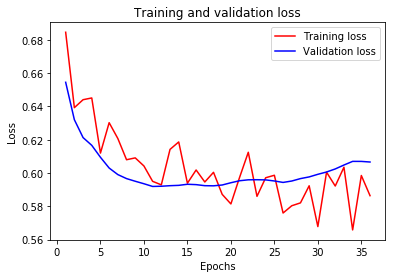

In [33]:
# Plot of the validation and training loss

plt.plot(epochs, loss, 'r', label='Training loss')#red line
plt.plot(epochs, val_loss, 'b', label='Validation loss')#blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

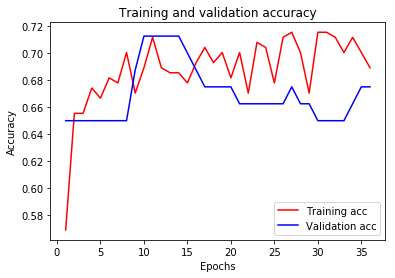

In [34]:
# Plot of the validation and train accuracy

plt.clf()   # clear figure

plt.plot(epochs, acc, 'r', label='Training acc')#red line
plt.plot(epochs, val_acc, 'b', label='Validation acc')#blue line
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Followed model

For this network, I tried first to do as much overfitting as possible, in order to reduce the overfitting in this case the graphics were very useful, since in them I was able to see the discrepancy between the validation and the train accuaracy/loss, so to get the best result of the network I increased the number of neurons and the dropout the have.

#### General conclusion
For the data set of the problems 2 and 3 is not possible to achieve the 85% that is required for the activity, since the data set is to small for the neural network to learn.